In [1]:
import json
import pandas as pd

with open('..\Data\Fuente_json\General\coin_markets.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_markets= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_markets)

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   
5     usd-coin   usdc  USD Coin   
6     dogecoin   doge  Dogecoin   
7      cardano    ada   Cardano   
8       solana    sol    Solana   
9         tron    trx      TRON   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...       29240.47   
1  https://assets.coingecko.com/coins/images/279/...        1840.34   
2  https://assets.coingecko.com/coins/images/325/...           1.00   
3  https://assets.coingecko.com/coins/images/825/...         240.41   
4  https://assets.coingecko.com/coins/images/44/l...           0.63   
5  https://assets.coingecko.com/coins/images/6319...           1.00   
6  https://assets.coingecko.com/coins/images/5/la...           0.07   
7  https://assets.coingecko.com/coins/images/9

In [2]:


# Convertir las columnas timestamp a tipo datetime y mostrar solo la fecha
coin_markets['ath_date'] = pd.to_datetime(coin_markets['ath_date']).dt.date
coin_markets['atl_date'] = pd.to_datetime(coin_markets['atl_date']).dt.date
coin_markets['last_updated'] = pd.to_datetime(coin_markets['last_updated']).dt.date

# Imprimir el DataFrame modificado
print(coin_markets)

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   
5     usd-coin   usdc  USD Coin   
6     dogecoin   doge  Dogecoin   
7      cardano    ada   Cardano   
8       solana    sol    Solana   
9         tron    trx      TRON   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...       29240.47   
1  https://assets.coingecko.com/coins/images/279/...        1840.34   
2  https://assets.coingecko.com/coins/images/325/...           1.00   
3  https://assets.coingecko.com/coins/images/825/...         240.41   
4  https://assets.coingecko.com/coins/images/44/l...           0.63   
5  https://assets.coingecko.com/coins/images/6319...           1.00   
6  https://assets.coingecko.com/coins/images/5/la...           0.07   
7  https://assets.coingecko.com/coins/images/9

In [3]:
coin_markets.drop(columns=['roi', "image"], inplace=True)

In [4]:
coin_markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      10 non-null     object 
 1   symbol                                  10 non-null     object 
 2   name                                    10 non-null     object 
 3   current_price                           10 non-null     float64
 4   market_cap                              10 non-null     int64  
 5   market_cap_rank                         10 non-null     int64  
 6   fully_diluted_valuation                 10 non-null     int64  
 7   total_volume                            10 non-null     int64  
 8   high_24h                                10 non-null     float64
 9   low_24h                                 10 non-null     float64
 10  price_change_24h                        10 non-null     float64
 

In [10]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_markets.to_excel("..\Data\Datos_Procesados\General\coin_markets.xlsx", sheet_name="coin_markets.xlsx", index=False, float_format="%.2f")

## Identificar Valores Faltantes:
No se encontraron valores Faltantes

In [11]:
# Verificar cuántos valores faltantes hay en cada columna
missing_values = coin_markets.isnull().sum()
print(missing_values)

id                                        0
symbol                                    0
name                                      0
image                                     0
current_price                             0
market_cap                                0
market_cap_rank                           0
fully_diluted_valuation                   0
total_volume                              0
high_24h                                  0
low_24h                                   0
price_change_24h                          0
price_change_percentage_24h               0
market_cap_change_24h                     0
market_cap_change_percentage_24h          0
circulating_supply                        0
total_supply                              0
max_supply                                6
ath                                       0
ath_change_percentage                     0
ath_date                                  0
atl                                       0
atl_change_percentage           

## Explorar Outliers:

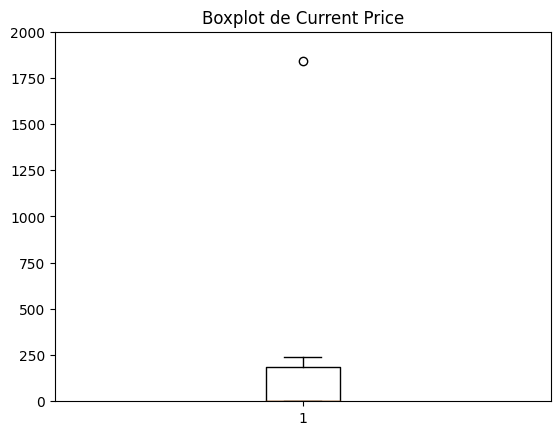

In [12]:
import matplotlib.pyplot as plt

# Boxplot para identificar outliers en la columna 'current_price'
plt.boxplot(coin_markets['current_price'])
plt.title('Boxplot de Current Price')
plt.ylim(0, 2000)  # Limitar el rango del eje y
plt.show()

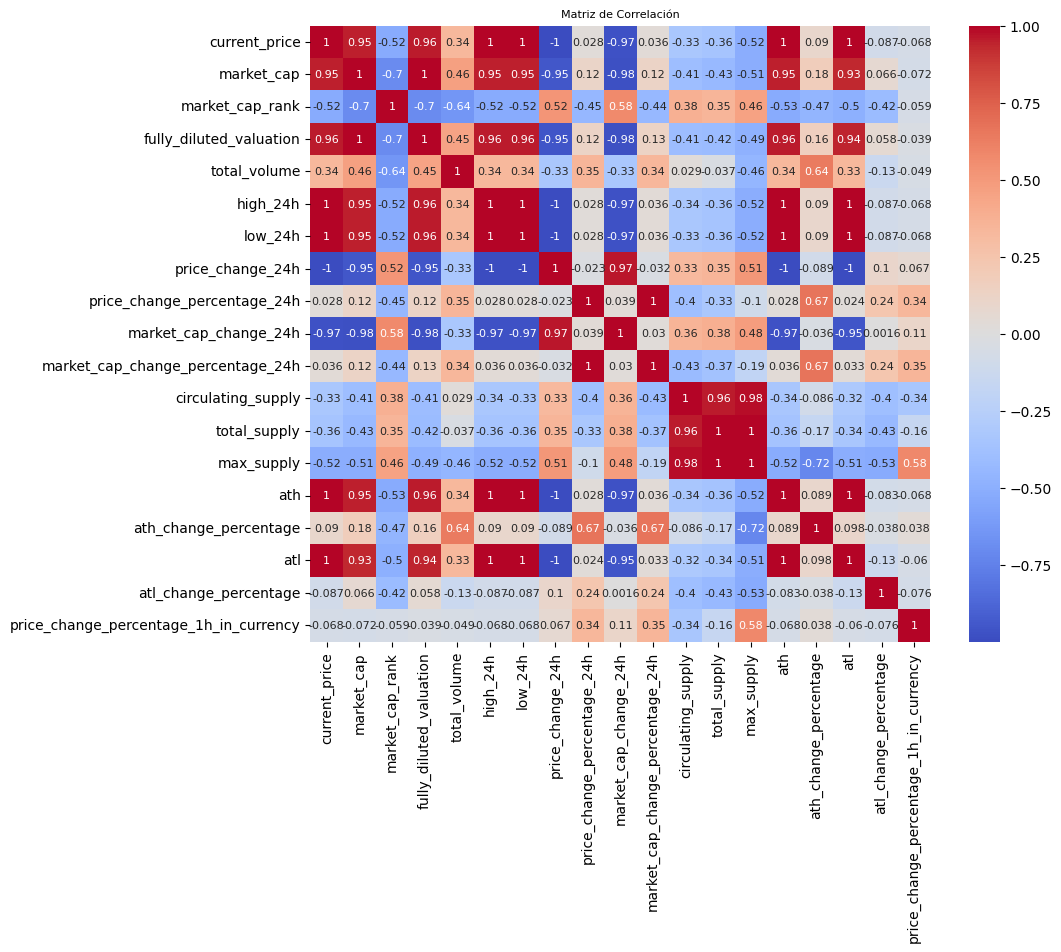

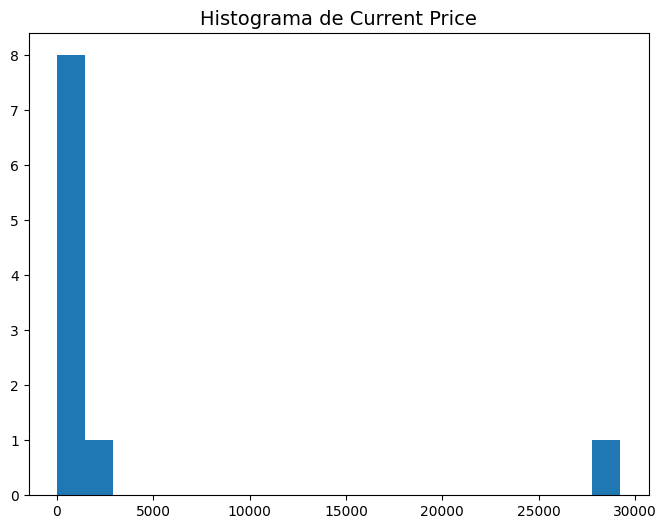

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_columns = coin_markets.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Ajusta el tamaño de la fuente aquí
plt.title('Matriz de Correlación', fontsize=8)  # Ajusta el tamaño de la fuente aquí
plt.show()

# Histograma de 'current_price'
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
plt.hist(coin_markets['current_price'], bins=20)
plt.title('Histograma de Current Price', fontsize=14)  # Ajusta el tamaño de la fuente aquí
plt.show()

In [15]:
# Cargar el JSON desde el archivo utilizando UTF-8 encoding
with open('..\Data\Fuente_json\General\exchange_rates.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
exchange_rates = pd.DataFrame(data['rates']).T

# Imprimir el DataFrame
print(exchange_rates)

                            name  unit      value       type
btc                      Bitcoin   BTC          1     crypto
eth                        Ether   ETH     15.901     crypto
ltc                     Litecoin   LTC    357.239     crypto
bch                 Bitcoin Cash   BCH     128.43     crypto
bnb                 Binance Coin   BNB    121.876     crypto
...                          ...   ...        ...        ...
xdr   IMF Special Drawing Rights   XDR   22069.15       fiat
xag          Silver - Troy Ounce   XAG   1298.881  commodity
xau            Gold - Troy Ounce   XAU     15.348  commodity
bits                        Bits  μBTC    1000000     crypto
sats                     Satoshi  sats  100000000     crypto

[61 rows x 4 columns]


In [17]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, btc to sats
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    61 non-null     object
 1   unit    61 non-null     object
 2   value   61 non-null     object
 3   type    61 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [18]:
print(exchange_rates.describe())

           name unit      value  type
count        61   61     61.000    61
unique       61   57     60.000     3
top     Bitcoin    $  29353.091  fiat
freq          1    3      2.000    46


In [19]:
type_counts = exchange_rates['type'].value_counts()
print(type_counts)

type
fiat         46
crypto       13
commodity     2
Name: count, dtype: int64


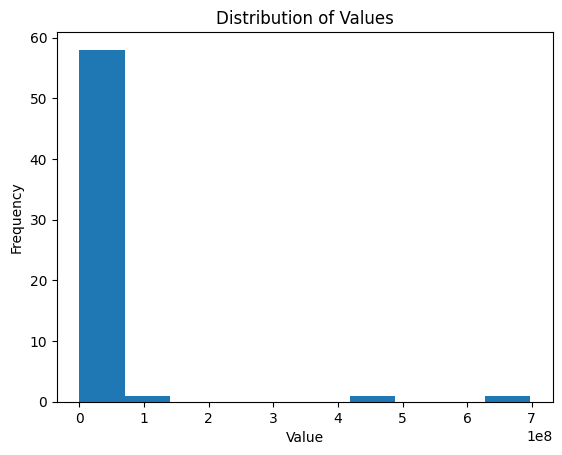

In [20]:
# Distribución de valores
plt.hist(exchange_rates['value'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.show()

C:\Users\Gio\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2547 (\N{BENGALI RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Gio\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)


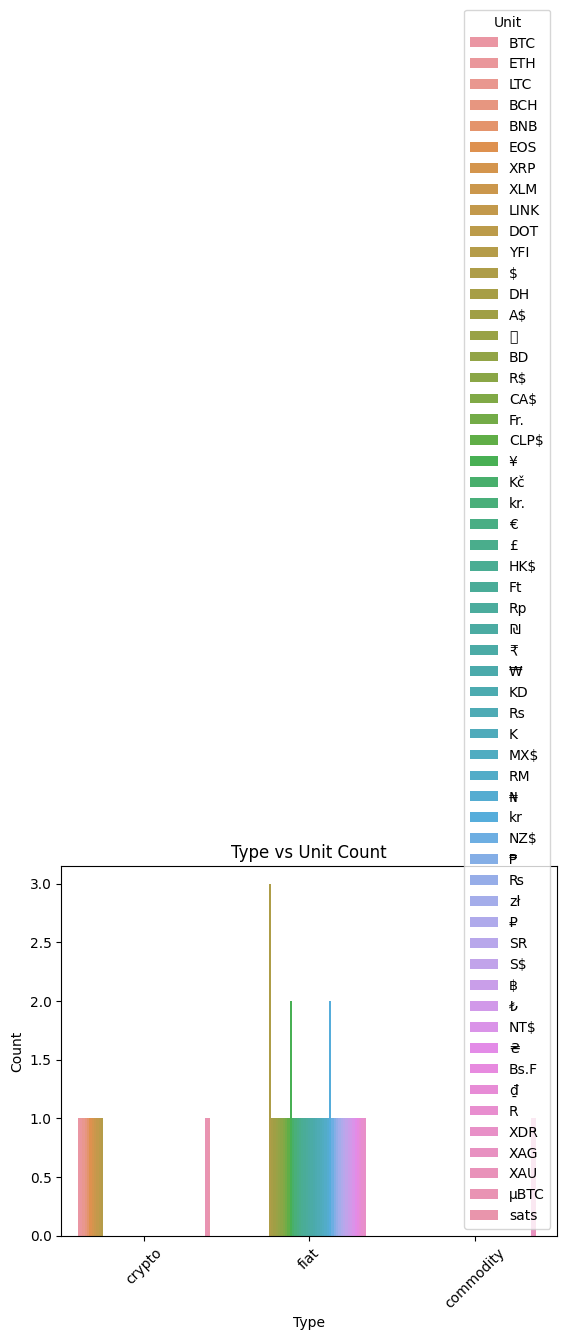

In [21]:
# Relación entre tipos y unidades
sns.countplot(data=exchange_rates, x='type', hue='unit')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type vs Unit Count')
plt.xticks(rotation=45)
plt.legend(title='Unit')
plt.show()

In [25]:
import pandas as pd

# Convertir la columna 'value' a tipo decimal
exchange_rates['value'] = pd.to_numeric(exchange_rates['value'], errors='coerce')

# Verificar el cambio
print(exchange_rates.dtypes)

name      object
unit      object
value    float64
type      object
dtype: object


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
exchange_rates.to_excel("..\Data\Datos_Procesados\General\exchange_rates.xlsx", sheet_name="exchange_rates.xlsx", index=False, float_format="%.2f")

In [28]:
with open('..\Data\Fuente_json\General\coins_categories_list.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coins_categories_list= pd.DataFrame(data)

# Imprimir el DataFrame
print(coins_categories_list)

                category_id                    name
0               aave-tokens             Aave Tokens
1        algorand-ecosystem      Algorand Ecosystem
2    alleged-sec-securities  Alleged SEC Securities
3                 analytics               Analytics
4             animal-racing           Animal Racing
..                      ...                     ...
202        yield-aggregator        Yield Aggregator
203           yield-farming           Yield Farming
204       zero-knowledge-zk     Zero Knowledge (ZK)
205       zilliqa-ecosystem       Zilliqa Ecosystem
206        zksync-ecosystem        ZkSync Ecosystem

[207 rows x 2 columns]


In [29]:
coins_categories_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  207 non-null    object
 1   name         207 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [30]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coins_categories_list.to_excel("..\Data\Datos_Procesados\General\coins_categories_list.xlsx", sheet_name="coins_categories_list.xlsx", index=False, float_format="%.2f")